In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
n = 50

# Simple case
# rectangle (source)
# source = np.array([[0,2,0,2],[0,0,1,1],[1,1,1,1]])
# trapezoid (target)
# target = np.array([[0,2,0,2],[0,0,1,2],[1,1,1,1]])

# source
source = np.random.randn(2,n)

#target
M = np.array([[3,1],[1,3]])
t = np.ones((2,1))
target = np.dot(M,source)+t

# Coordonnées homogènes
source = np.concatenate((source,np.ones((1,n))))
target = np.concatenate((target,np.ones((1,n))))


print(source.shape,'\n\n',target.shape)

(3, 50) 

 (3, 50)


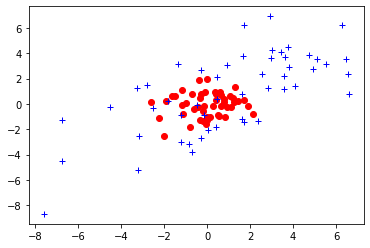

In [71]:
plt.plot(source[0,:],source[1,:],'ro')
plt.plot(target[0,:],target[1,:],'b+')
plt.show()

In [72]:
x = target[0,:]
y = target[1,:]

X = source[0,:]
Y = source[1,:]

print(x,y,X,Y)

[-1.21914659  3.01531719  2.95571861  6.57479652 -7.5736076  -3.18893335
  5.12046088  6.43709014  3.56490182  3.43290317  0.44343649  0.44148905
 -1.35148709  1.63377959  3.55433716 -4.50185259 -0.2614502  -3.14735412
  4.73808606 -6.75980554  1.73787175  6.25361061  2.5298284  -0.1306583
  4.92016448  5.51775903 -6.76177463  3.73862295  2.38103289 -0.83299485
 -2.80797299  3.62783562 -0.26359657 -1.21365804  0.92801105  0.03925249
 -0.46780041  1.64862066  4.07073262  1.6101938  -3.25941453  3.79645485
  6.54453069 -1.8329368  -2.51512879  1.71496064 -0.72235704  2.90313929
  0.42567246  2.83749294] [-0.91059954  4.26066572  3.64350016  0.74672674 -8.68764696 -5.18518286
  3.58213993  3.5603144   2.23456116  4.10012084  2.09195366  0.3825306
  3.15990037 -1.15225296  1.14673567 -0.23929943  2.68138204 -2.54472728
  3.8516468  -1.25076882  6.25853035  6.21608311  2.38855753 -0.8881437
  2.79183608  3.13278431 -4.47262247  4.4743219  -1.35136778 -3.12557341
  1.47166787  3.67767865 -2.

In [73]:
rows0 = np.zeros((3,n))

rowsXY = -np.ones((3,n))
rowsXY[0,:] = -X
rowsXY[1,:] = -Y

hx = np.zeros((9,n))
hx[0:3,:] = rowsXY
hx[6,:] = np.multiply(x,X)
hx[7,:] = np.multiply(x,Y)
hx[8,:] = x

hy = np.zeros((9,n))
hy[3:6,:] = rowsXY
hy[6,:] = np.multiply(y,X)
hy[7,:] = np.multiply(y,Y)
hy[8,:] = y

h = np.concatenate((hx,hy),axis=1)
print(h)

[[ 5.93355030e-01 -3.48160733e-01 -4.02956960e-01 -2.12220785e+00
   2.00414698e+00  7.97702147e-01 -1.22240534e+00 -1.71886950e+00
  -8.07518037e-01 -5.24823582e-01  3.45205525e-01  1.32257932e-01
   1.15179521e+00 -5.06698966e-01 -9.39534476e-01  1.90828229e+00
   6.83216579e-01  1.11216688e+00 -1.04532642e+00  2.62858098e+00
   3.80614387e-01 -1.31809359e+00 -4.00115960e-01  1.87978902e-01
  -1.24608217e+00 -1.42756160e+00  2.22658768e+00 -5.92693367e-01
  -8.11808306e-01  1.71676394e-01  1.48694836e+00 -6.50728526e-01
   1.13224303e-02  3.24947613e-01  2.86336567e-01 -1.88347833e-02
   4.11114017e-01  1.02306637e-01 -1.10283169e+00 -2.54004133e-01
   1.63143655e+00 -8.08807105e-01 -1.90819827e+00  9.61865601e-01
   1.15671809e+00 -5.67381603e-01  4.58749346e-02  2.72568016e-02
  -1.40234260e-01 -6.58373533e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [74]:
u, s, vh = np.linalg.svd(h)
print(u[:,8])

v = np.reshape(u[:,8],(3,3))

print(v)

[6.25543242e-01 2.08514414e-01 2.08514414e-01 2.08514414e-01
 6.25543242e-01 2.08514414e-01 1.82295906e-16 7.37322308e-17
 2.08514414e-01]
[[6.25543242e-01 2.08514414e-01 2.08514414e-01]
 [2.08514414e-01 6.25543242e-01 2.08514414e-01]
 [1.82295906e-16 7.37322308e-17 2.08514414e-01]]


In [75]:
q = np.dot(v,source)
print(q)

p = q[2,:];

xx = np.divide(q[0,:],p)
yy = np.divide(q[1,:],p)

y = np.zeros((2,n))
y[0,:] = xx
y[1,:] = yy

print(y)

[[-0.25420964  0.6287371   0.61630994  1.37093984 -1.57920635 -0.66493857
   1.0676899   1.34222608  0.74333341  0.71580979  0.0924629   0.09205683
  -0.28180454  0.34066659  0.74113053 -0.93870116 -0.05451613 -0.6562687
   0.98795924 -1.40951689  0.36237131  1.30396795  0.52750569 -0.02724414
   1.02592521  1.15053229 -1.40992747  0.77955677  0.49647968 -0.17369143
  -0.58550284  0.75645602 -0.05496368 -0.25306519  0.19350368  0.00818471
  -0.09754313  0.34376117  0.84880643  0.33574862 -0.67963491  0.79161556
   1.36462898 -0.38219374 -0.52444061  0.35759401 -0.15062186  0.60534639
   0.08875884  0.59165818]
 [-0.18987313  0.88841022  0.7597223   0.15570329 -1.81149962 -1.08118537
   0.74692781  0.74237687  0.46593821  0.85493429  0.43620249  0.07976314
   0.65888478 -0.24026135  0.23911092 -0.04989738  0.5591068  -0.53061232
   0.80312388 -0.26080333  1.30499379  1.29614293  0.49804867 -0.18519076
   0.58213806  0.65323068 -0.93260625  0.93296061 -0.28177966 -0.65172711
   0.3068639

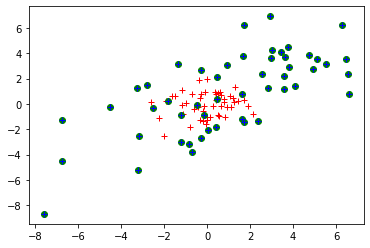

In [78]:
plt.plot(source[0,:],source[1,:],'r+')
plt.plot(y[0,:],y[1,:],'go')
plt.plot(target[0,:],target[1,:],'b+')
plt.show()

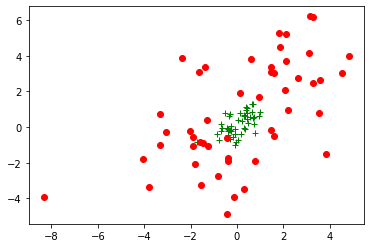

In [68]:
plt.plot(q[0,:],q[1,:],'g+')
plt.plot(y[0,:],y[1,:],'ro')
plt.show()